# (Ford GoBike System Data Exploration)
## by (Gamal Samir ALi Abdalluh Shouman)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#Loading and showing the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(7)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# determiation the Distance Between each Two stations using its coordinates
lat_1 = df['start_station_latitude'].apply(lambda x:np.radians(x))
lat_2 = df['end_station_latitude'].apply(lambda x:np.radians(x))
lon_1 = df['start_station_longitude'].apply(lambda x:np.radians(x))
lon_2 = df['end_station_longitude'].apply(lambda x:np.radians(x))

# Haversine formula
d_lon = lon_2 - lon_1
d_lat = lat_2 - lat_1
a = d_lat.apply(lambda x:np.sin(x/2)**2) + lat_1.apply(lambda x:np.cos(x)) \
        * lat_2.apply(lambda x:np.cos(x)) * d_lon.apply(lambda x:np.sin(x/2)**2)

c = a.apply(lambda x: 2 * np.arcsin(np.sqrt(x)))

# Radius of earth in meter. Use 6371 for km
r = 6371
df['distance_Km'] = c.apply(lambda x: r * x)

In [7]:
df[df['distance_Km'] == 0].shape

(3880, 17)

In [8]:
df.duplicated().sum()

0

In [9]:
df[df['member_birth_year'] < 1950].shape

(674, 17)

#### Some problems in the data
* Missing values in some clolumnns
* some illogical values in the `member_birth_year` like (1878, 1910, 1920,....etc)
* invalid data types.

In [10]:
df_clean = df.copy()

In [11]:
# Dropping missing values
df_clean.dropna(inplace=True)

In [12]:
# fixing data types
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

In [13]:
# dropping all values with 0 distance 
df_clean.drop(index=df_clean.loc[(df_clean['distance_Km'] == 0),:].index, inplace=True)

In [14]:
# checking the values in columns "duration_sec" equal difference values between the end time and the start time  
df_clean['duration_sec'] = (df_clean['end_time'] - df_clean['start_time']).apply(lambda x: int(x.total_seconds()))

In [15]:
# dropping all values that less than 1950
df_clean.drop(index=df_clean.loc[(df_clean['member_birth_year'] < 1950),:].index, inplace=True)

In [16]:
# adding new variabel day of the week
df_clean['day_of_week'] = df_clean['start_time'].dt.day_name()

days = ['Monday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']
days = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df_clean['day_of_week'] = df_clean['day_of_week'].astype(days)

In [17]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
distance_Km                0
day_of_week                0
dtype: int64

In [18]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
distance_Km                       float64
day_of_week                      category
dtype: object

In [19]:
df_clean[df_clean['distance_Km'] == 0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_Km,day_of_week


### What is the structure of your dataset?

> There are 170839 trips in this dataset with 18 features('duration_sec', 'start_time', 'end_time', 'start_station_id',
'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip','distance_Km', 'day_of_week') these trips happened in the period between febreuary and march in 2019.
- all the other features are categorical features.
- Features (start_time', 'end_time') are datatime 
- Features ('duration_sec', 'start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude') are numeric 

### What is/are the main feature(s) of interest in your dataset?

> I am interesting in  ploting what features are best for predicting the duration of the trips in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the other user's infromation: user_type, member_birth_year, and member_gender, day_of_week, will have effects on the duration, though to a much smaller degree than the main effect of the distance.

## Univariate Exploration

In [20]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,distance_Km
count,170839.000000,170839.000000,170839.000000,170839.000000,170839.000000,170839.000000,170839.000000
mean,682.438302,37.771466,-122.352265,37.771666,-122.351832,1984.982258,1.724848
std,1536.702344,0.099639,0.116994,0.099540,0.116546,9.643024,1.080548
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1950.000000,0.013287
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,0.939302
50%,508.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,1.456572
75%,779.000000,37.797320,-122.283127,37.797320,-122.287610,1992.000000,2.249416
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,69.469241


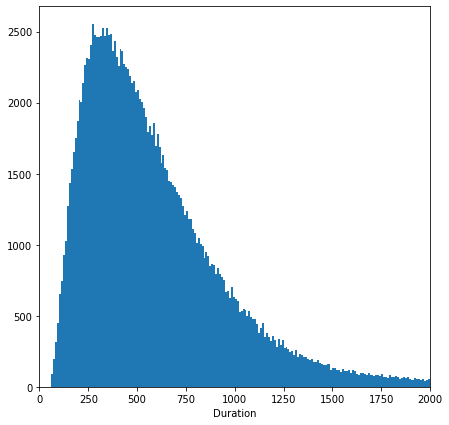

In [21]:
# starting with a standard-scaled plot
plt.figure(figsize=(7, 7))
bins = np.arange(0, 2000+10, 10)
plt.hist(data=df_clean, x='duration_sec', bins=bins)
plt.xlim([0, 2000])
plt.xlabel('Duration');

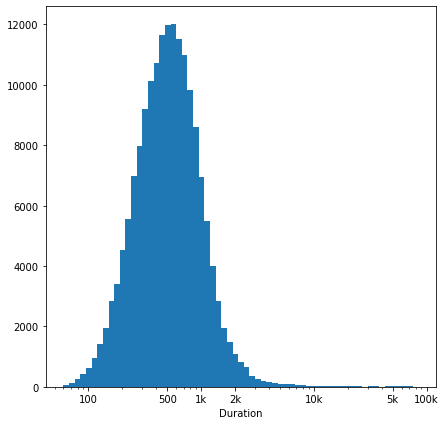

In [22]:
# putting the data on a log scale instead to get a deeper look
log_binsize = 0.05
bins =10** np.arange(np.log10(60), np.log10(84548)+log_binsize, log_binsize)

plt.figure(figsize=(7, 7))
plt.hist(data=df_clean, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([100, 500, 1e3, 2e3, 5e4, 1e4, 1e5], [100, 500, '1k', '2k', '5k', '10k', '100k'])
plt.xlabel('Duration');

From the figures of the duration, Most of the trips have small duration.
The log-scale of the duration the distribution looks uinmodle and its peak at 500 seconds.
After 10k second there are some outliers.

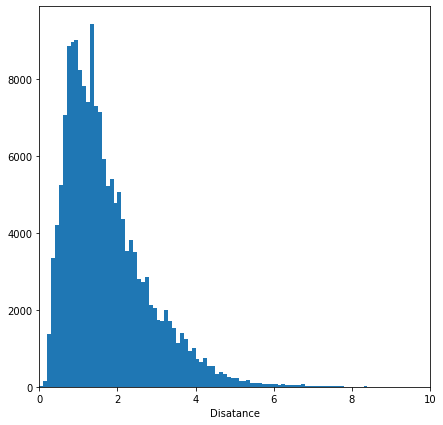

In [23]:
# starting with a standard-scaled plot
plt.figure(figsize=(7, 7))
bins = np.arange(0, 10+0.1, 0.1)
plt.hist(data=df_clean, x='distance_Km', bins=bins)
plt.xlim([0, 10])
plt.xlabel('Disatance');

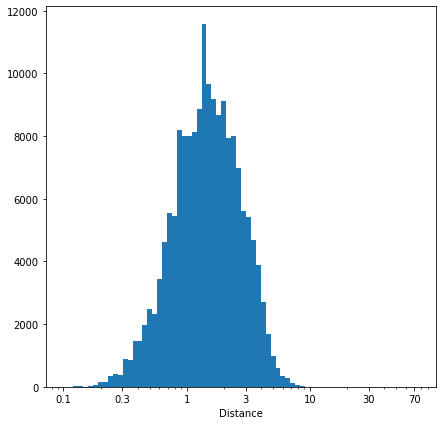

In [24]:
# putting the data on a log scale instead to get a deeper look
log_binsize = 0.04
bins =10** np.arange(-1, np.log10(70)+log_binsize, log_binsize)

plt.figure(figsize=(7, 7))
plt.hist(data=df_clean, x='distance_Km', bins=bins)
plt.xscale('log')
plt.xticks([0.1, 0.3, 1, 3, 10, 30, 70], [0.1, 0.3, 1, 3, 10, 30, 70])
plt.xlabel('Distance');

From the figures of the distance the distribution has a long tail and most of the trips lie between 0 to 4 km.
The log-scale of the duration the distribution looks uinmodle and its peak at 2 km.

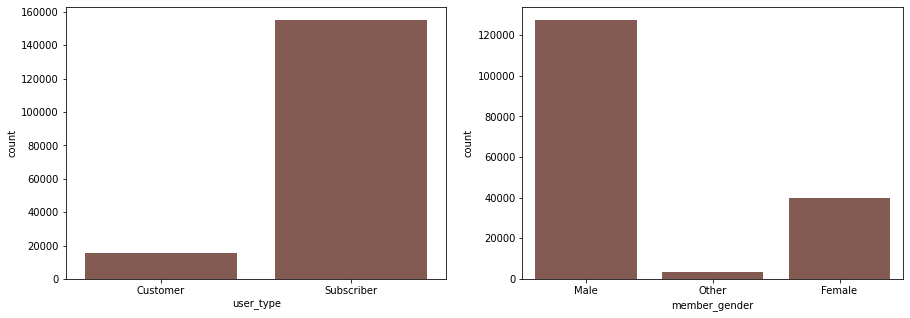

In [25]:
# plotting the two categorical variable user_type & member_gender
fig, ax = plt.subplots(ncols=2, figsize = [15,5])
base_color = sb.color_palette()[5]
sb.countplot(data=df_clean, x='user_type', color=base_color, ax=ax[0])
sb.countplot(data=df_clean, x='member_gender', color=base_color , ax=ax[1]);

> * In the Figure of user type the number of subscribers is very biger than the number of customers.
> * In the Figure of member gender the number of males is the biggest and number of females is the second order and finally the number of others.

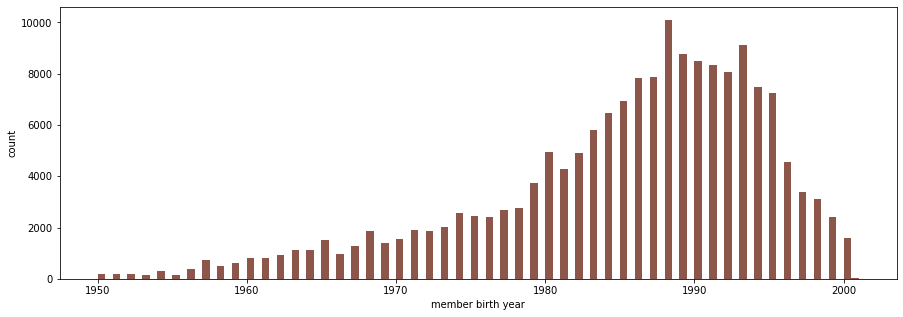

In [27]:
#Distribution of the member bith year
bins = np.arange(1950, 2001+0.5, 0.5)
plt.figure(figsize=(15, 5))
plt.hist(data=df_clean, x='member_birth_year', bins=bins, color=base_color, alpha=1)
plt.xlabel('member birth year')
plt.ylabel('count');

> * In the figure of member_birth-year we find that most of the riders were born in 1980s or 1990s and a few of them were born 1950s to 1970s.

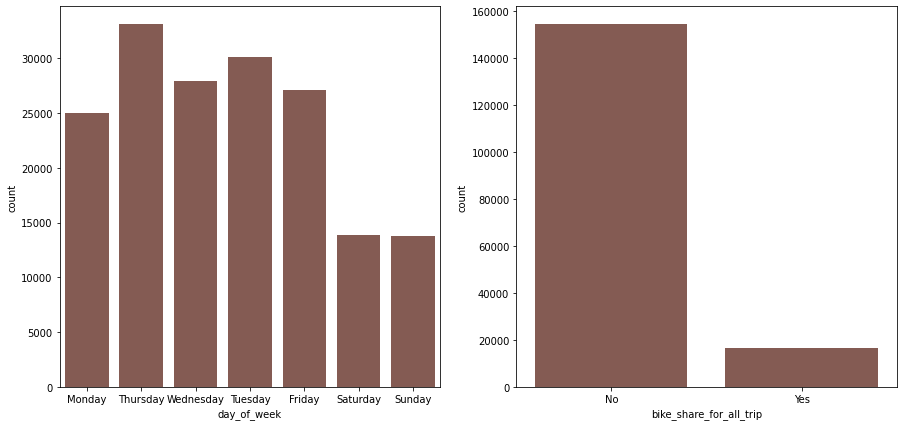

In [28]:
# plotting the two categorical variable day_of_week & bike_share_for_all_trip
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sb.countplot(data=df_clean, x='day_of_week', color=base_color, alpha=1)
plt.subplot(1, 2, 2)
sb.countplot(data=df_clean, x='bike_share_for_all_trip', color=base_color, alpha=1);

> * We find that Thursday is the most crowded day and the lowest number of trips is in Sunday
> * The count of bike share is very less than bikes were not shared

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration, Most of the trips have small duration.
The log-scale of the duration the distribution looks uinmodle and its peak at 500 seconds.
After 10k second there are some outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * Some illogical values in the `member_birth_year` like (1878, 1910, 1920,....etc) So I started from 1950s and droped the others

## Bivariate Exploration

In [29]:
num_vars = ['duration_sec', 'distance_Km', 'member_birth_year']
cat_vars = ['user_type', 'member_gender', 'day_of_week', 'bike_share_for_all_trip']

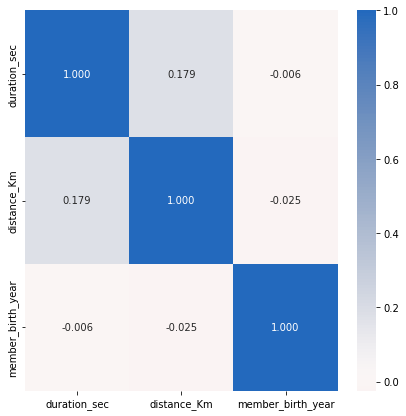

In [30]:
#correlation
plt.figure(figsize=(7,7))
sb.heatmap(df_clean[num_vars].corr(), annot=True, fmt='.3f', cmap="vlag_r", center=0);

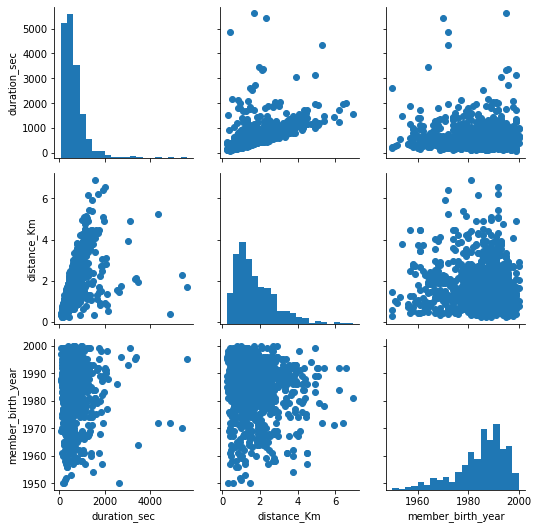

In [31]:
# plotting matrix, sample 1000 diamonds so that plots are clearer and they render faster
sample = np.random.choice(df_clean.shape[0], 1000, replace=False)
df_sample = df_clean.iloc[sample,:]
g = sb.PairGrid(data = df_sample, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

as shown above ,the correlation between the duration and distance variables and the member birth year hase a week positive correlation

> * Showing how duration and distance correlate with the categorical variables.

C:\Users\al\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\al\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\al\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, an

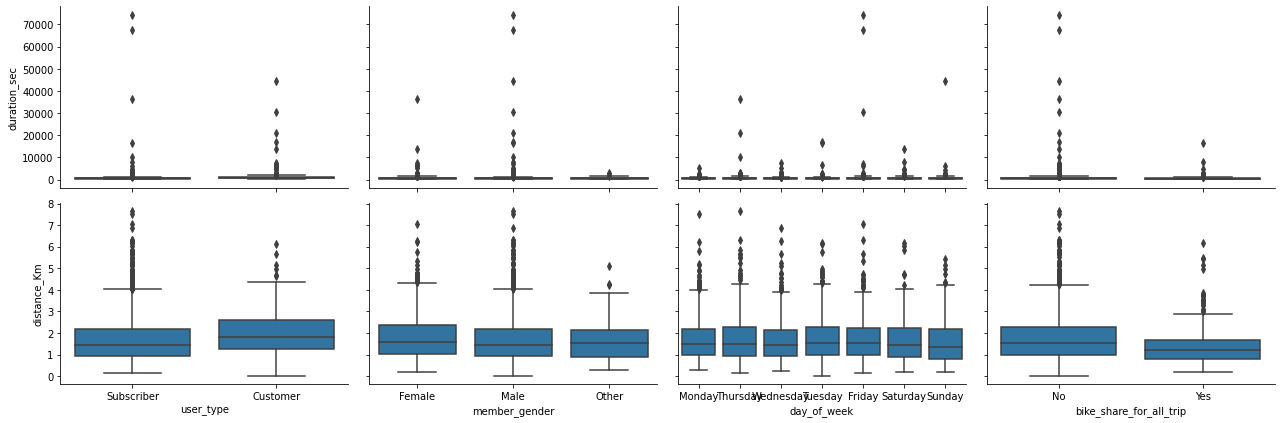

In [32]:
# plotting matrix of numeric features with categorical features
sample = np.random.choice(df_clean.shape[0], 3000, replace = False)
df_samp = df_clean.iloc[sample,:]
def box_grid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color=default_color)

g = sb.PairGrid(data=df_samp, y_vars=['duration_sec', 'distance_Km'], x_vars=cat_vars, size=3, aspect=1.5)
g.map(box_grid);

> * Showing relationships between the four categorical features.

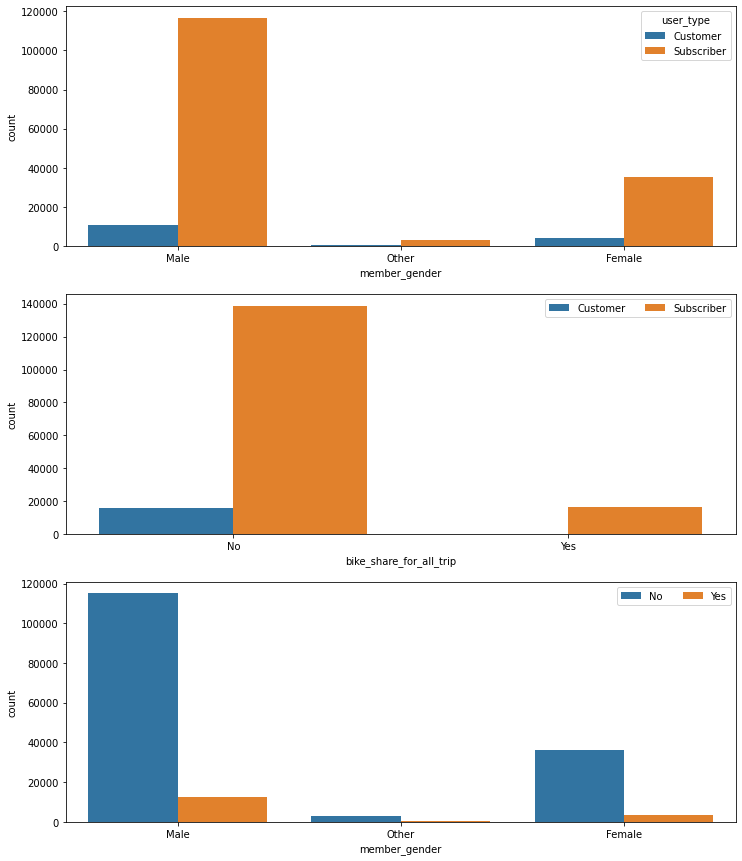

In [34]:
# using the full data to show the three subplots
plt.figure(figsize = [12, 15])

# subplot 1 :- " user_type vs member_gender"
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')

# subplot 2 :- " bike_share_for_all_trip vs  user_type"
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'bike_share_for_all_trip', hue = 'user_type')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3:- "member_gender vs  bike_share_for_all_trip"
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'member_gender', hue = 'bike_share_for_all_trip')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping 

As we excepeted subscirber , NO and Male are represented in the data more than the others.
But the new here is that all riders that thier gender is other or they shard thier bikes are subscribers

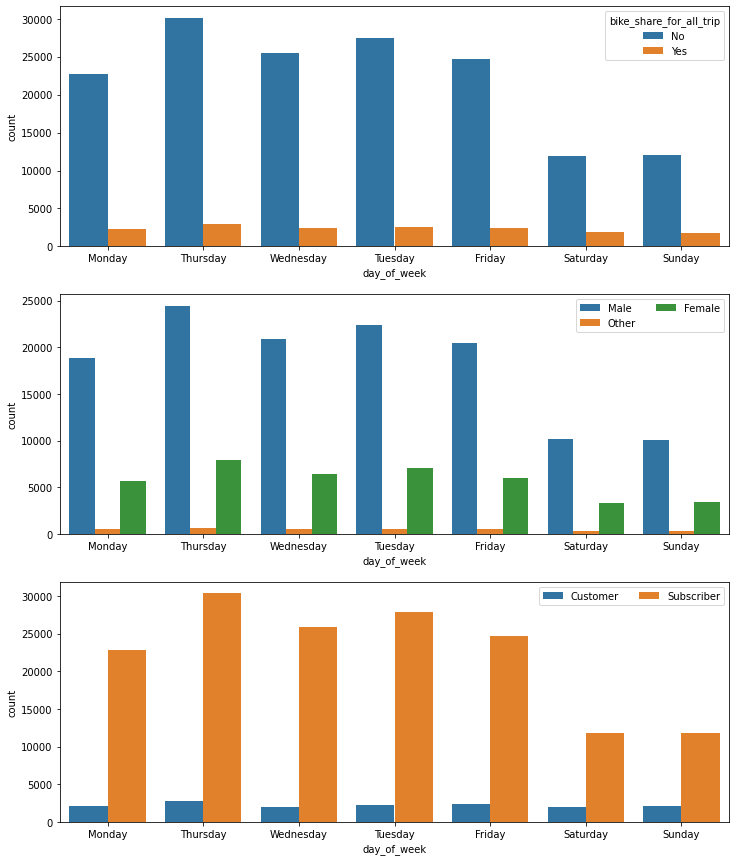

In [35]:
plt.figure(figsize = [12, 15])

# subplot 1:bike_share_for_all_trip vs. 'day_of_week' 
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x ='day_of_week' , hue = 'bike_share_for_all_trip')

# subplot 2:member_gender vs.'day_of_week' 
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'day_of_week', hue = 'member_gender')

ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: day_of_week vs user_type 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'day_of_week', hue = 'user_type')

ax.legend(loc = 1, ncol = 3); # re-arrange legend to remove overlapping 

No intersections between these categorical variables

Showing the relation between the duration and distance

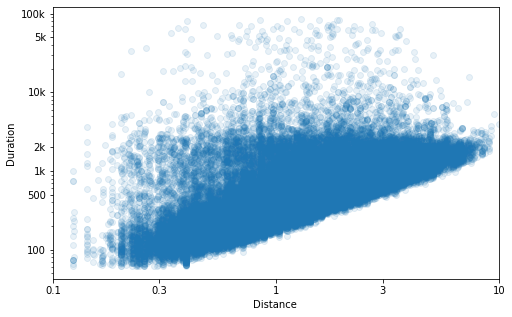

In [36]:
# creat a log transformation colums for duration and distance
def log_trans(x, inverse=False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)


df_clean['log_duration'] = df_clean['duration_sec'].apply(log_trans)
df_clean['log_distance'] = df_clean['distance_Km'].apply(log_trans)

# plotting duration vs distance but on log-scale
plt.figure(figsize=(8,5))
plt.scatter(data=df_clean, x='log_distance', y='duration_sec', alpha=1/10)
plt.yscale('log')
plt.xlim([log_trans(.1), log_trans(10)])
plt.yticks([100, 500, 1e3, 2e3, 5e4, 1e4, 1e5], [100, 500, '1k', '2k', '5k', '10k', '100k'])
plt.xticks(log_trans(np.array([0.1, 0.3, 1, 3, 10])), [0.1, 0.3, 1, 3, 10])
plt.xlabel('Distance ')
plt.ylabel('Duration ');

there is a strong positive correlation between the duration and distance variable when they were plotted in the log-scale.

Another look about the relationship between duration & distance on log scale and the other categorical variables.

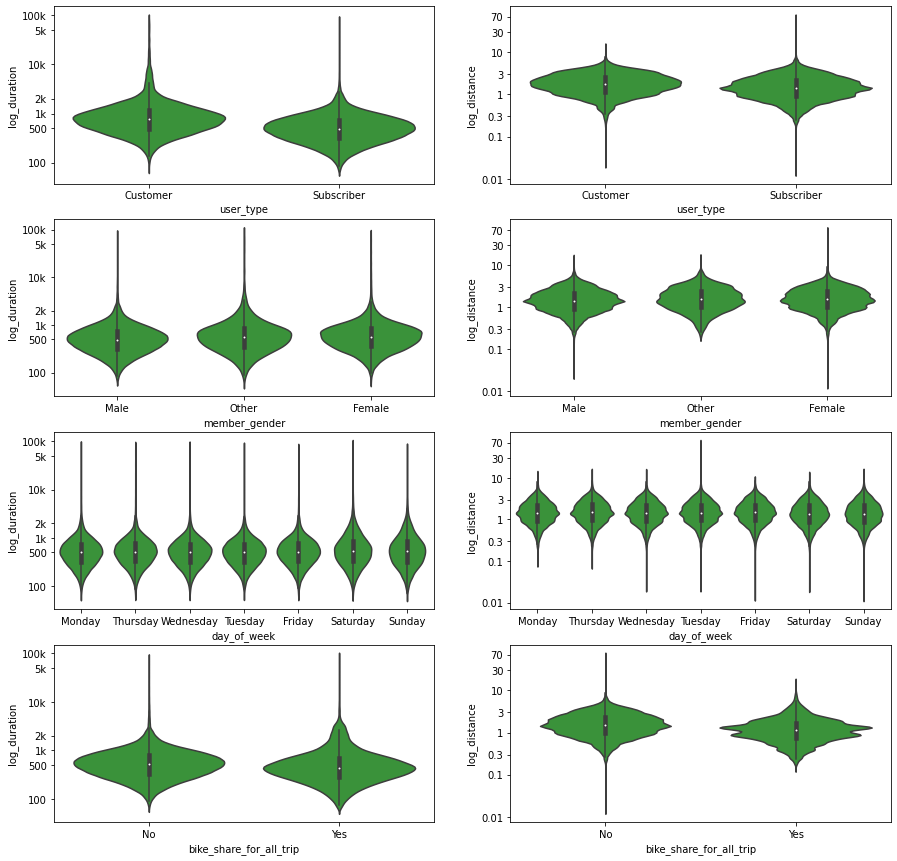

In [37]:
# plotting the categorical variables with the duration and distance again this time with full data and variable transforms
default_color = sb.color_palette()[2]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for x in range(len(cat_vars)):
    var = cat_vars[x]
    sb.violinplot(data=df_clean, x=var, y='log_duration', ax=ax[x, 0], color=default_color)
    ax[x, 0].set_yticks(log_trans(np.array([100, 500, 1e3, 2e3, 5e4, 1e4, 1e5])))
    ax[x,0].set_yticklabels([100, 500, '1k', '2k', '5k', '10k', '100k'])
    
    sb.violinplot(data=df_clean, x=var, y='log_distance', ax=ax[x, 1], color=default_color)
    ax[x, 1].set_yticks(log_trans(np.array([0.01, 0.1, 0.3, 1, 3, 10, 30, 70])))
    ax[x,1].set_yticklabels([0.01, 0.1, 0.3, 1, 3, 10, 30, 70]);

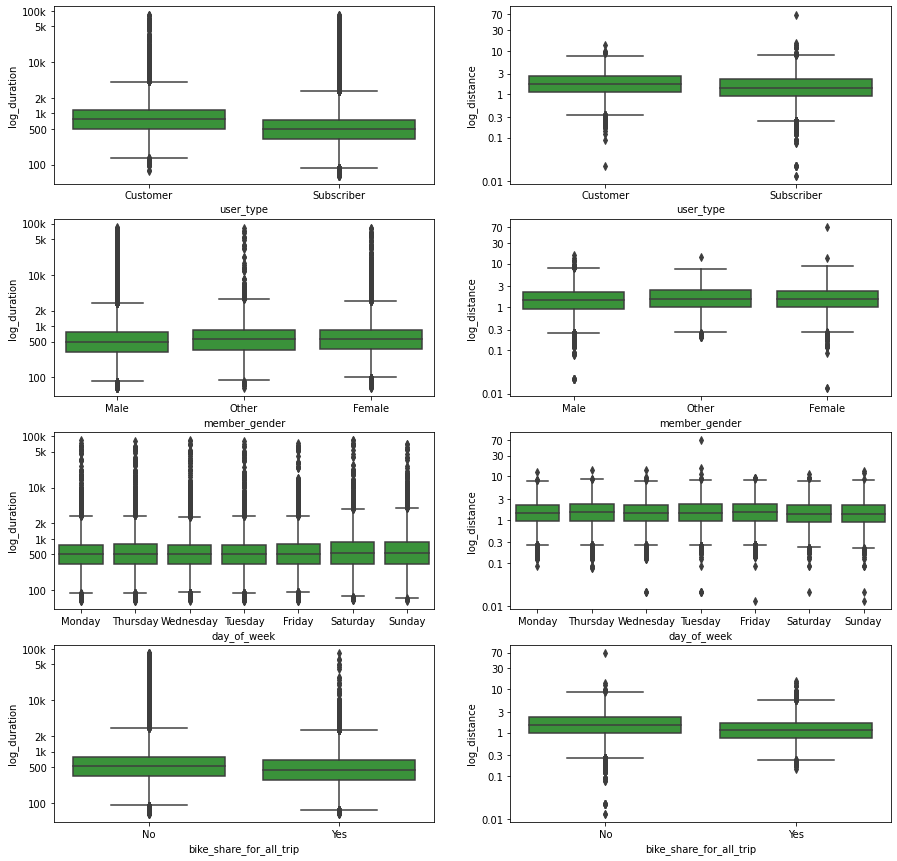

In [52]:
# plotting the categorical variables with the duration and distance again, this time with full data and variable transforms
default_color = sb.color_palette()[2]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for i in range(len(cat_vars)):
    var = cat_vars[i]
    sb.boxplot(data=df_clean, x=var, y='log_duration', ax=ax[i, 0], color=default_color)
    ax[i, 0].set_yticks(log_trans(np.array([100, 500, 1e3, 2e3, 5e4, 1e4, 1e5])))
    ax[i,0].set_yticklabels([100, 500, '1k', '2k', '5k', '10k', '100k'])
    
    sb.boxplot(data=df_clean, x=var, y='log_distance', ax=ax[i, 1], color=default_color)
    ax[i, 1].set_yticks(log_trans(np.array([0.01, 0.1, 0.3, 1, 3, 10, 30, 70])))
    ax[i,1].set_yticklabels([0.01, 0.1, 0.3, 1, 3, 10, 30, 70]);

In this plot we can see a lot of things:-
- The median of the duration for males is less than femals and others and this because males have a less distance median than Them. 

- Bike_share_for_all_trip has an opposite relation of user_type, for bike sharing, bikes not be shared have longer durations than bikes be shared for the same distance.

- The median of the duration for subscribers is less than customer although the difference in distance medians is very small so, here we can say that in general subscribers have small durations than customers for the smae trip distance

- days of the week don't have any effect on the trip duration even if we saw slightly weekend trips duration median is bigger than the other days.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * The Duration has a weak correlation with the distance when they are plotted on thier standard scales and they have a very strong positive correlation plotting them on the log-scale. The scatter plot suggested that Most of the trips' distances are between 0.3 & 10 Km and  most of the trips' durations are less than 2k sec.

> * we observe that subscribers can do long trips in short durations than customers and slightly males can do that than females and aslo not shared bikes can do long trips in short durations than shared bikes. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a small negative correlation between the member birth year and the distance and the duration variables so it won't be explored further.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

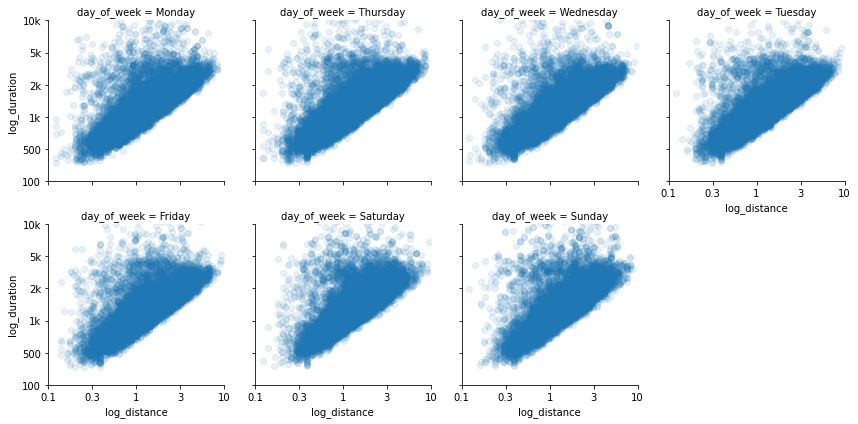

In [44]:
# ploting the relation of duration and distance for each day
j = sb.FacetGrid(data=df_clean, col='day_of_week', col_wrap=4, height=3,
                 xlim=[log_trans(0.1), log_trans(10)], ylim=[log_trans(60), log_trans(1e4)])
j.map(plt.scatter, 'log_distance', 'log_duration', alpha=1/10);
j.set_yticklabels([100, 500, 1e3, 2e3, 5e4, 1e4])
j.set_yticklabels([100, 500, '1k', '2k', '5k', '10k'])

j.set_xticklabels([0.1, 0.3, 1, 3, 10])
j.set_xticklabels([0.1, 0.3, 1, 3, 10]);

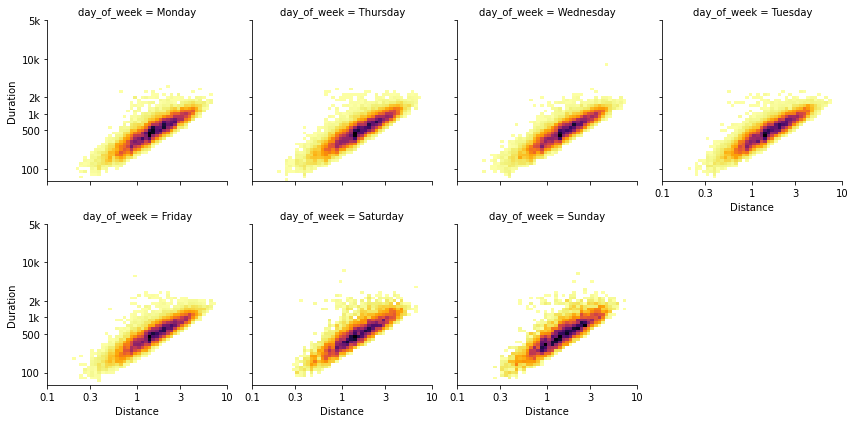

In [45]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(log_trans(.1), log_trans(10)+0.04, 0.04)
    bins_y = np.arange(log_trans(60), log_trans(1e4)+0.05, 0.05)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 5)
    plt.xticks(log_trans(np.array([0.1, 0.3, 1, 3, 10])), [0.1, 0.3, 1, 3, 10])
    plt.yticks(log_trans(np.array([100, 500, 1e3, 2e3, 5e4, 1e4])),
               [100, 500, '1k', '2k', '5k', '10k'])

# create faceted heat maps on days of the week variable
j = sb.FacetGrid(data = df_clean, col = 'day_of_week', col_wrap = 4, height = 3,
                 xlim=[log_trans(0.1), log_trans(10)], ylim=[log_trans(60), log_trans(1e4)])
j.map(hist2dgrid, 'log_distance', 'log_duration', color = 'inferno_r')
j.set_xlabels('Distance')
j.set_ylabels('Duration');

As shown the heatmap plot matrix is clear than the scatter plot matrix, in this we can see that the cloud of points moves towards the bottom right of the plot in weekend days 

C:\Users\al\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


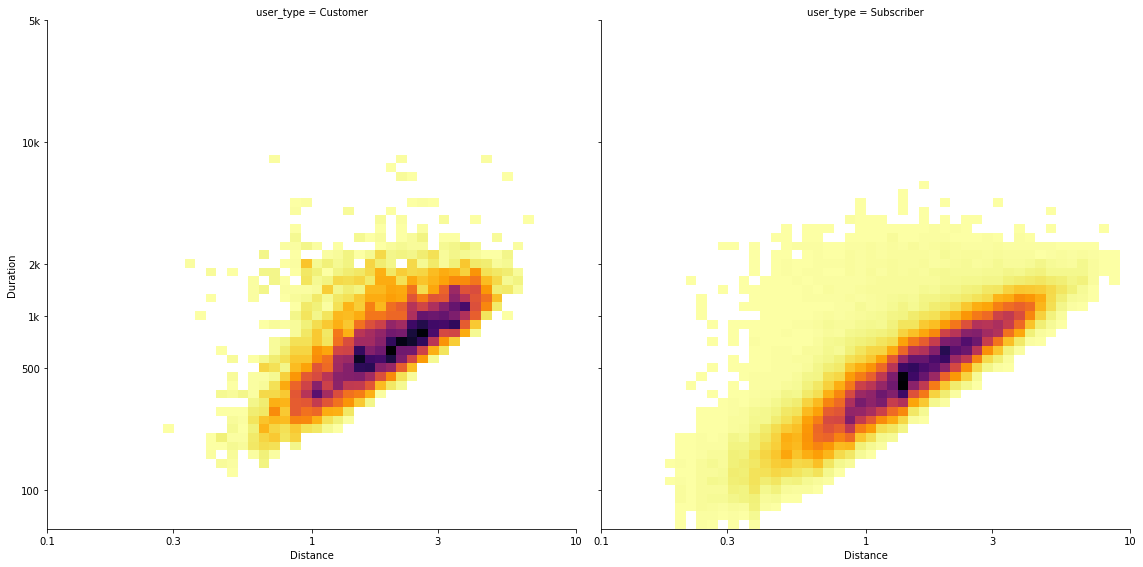

In [46]:
# create faceted heat maps on days of the week variable
j = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 2, size = 8,
                 xlim=[log_trans(0.1), log_trans(10)], ylim=[log_trans(60), log_trans(1e4)])
j.map(hist2dgrid, 'log_distance', 'log_duration', color = 'inferno_r')
j.set_xlabels('Distance')
j.set_ylabels('Duration');

the cloud of point of customers moves towards the bottom right of the plotless than the cloud of points of subscribers thats mean the customers do short trips in long durations than subscribers

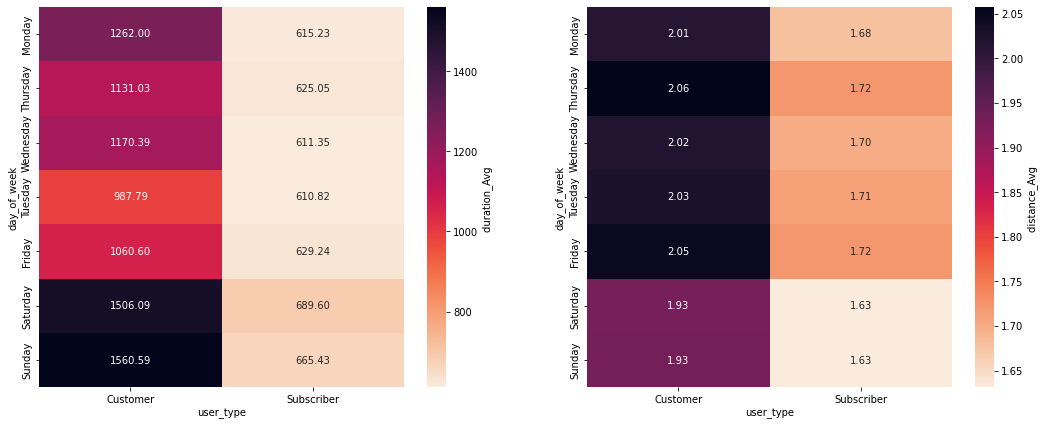

In [52]:
# "user_type", 'day_of_week' vs 'distance_Km'
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 2)
c_mean = df_clean.groupby(['day_of_week', 'user_type']).mean()['distance_Km']
c_mean = c_mean.reset_index(name='distance_Avg')
c_mean = c_mean.pivot(index='day_of_week', columns='user_type', values='distance_Avg')
sb.heatmap(c_mean, annot=True, fmt='.2f', cbar_kws={'label': 'distance_Avg '}, cmap='rocket_r');


#  "user_type ", " day_of_week"  vs 'duration_sec'
plt.subplot(1, 2, 1)
c_mean = df_clean.groupby(['day_of_week', 'user_type']).mean()['duration_sec']
c_mean = c_mean.reset_index(name='duration_Avg')
c_mean =c_mean.pivot(index='day_of_week', columns='user_type', values='duration_Avg')
sb.heatmap(c_mean, annot=True, fmt='.2f', cbar_kws={'label': 'duration_Avg '}, cmap='rocket_r');



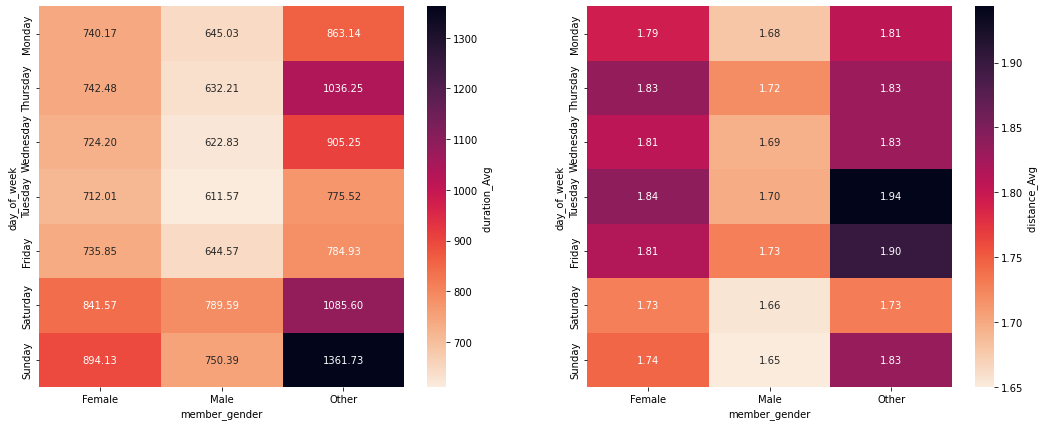

In [54]:
#  "member_gender","day_of_week" vs 'distance_Km'
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 2)
c_mean = df_clean.groupby(['day_of_week', 'member_gender']).mean()['distance_Km']
c_mean = c_mean.reset_index(name='distance_Avg')
c_mean = c_mean.pivot(index='day_of_week', columns='member_gender', values='distance_Avg')
sb.heatmap(c_mean, annot=True, fmt='.2f', cbar_kws={'label': 'distance_Avg '}, cmap='rocket_r');


#  "member_gender","day_of_week" vs 'duration_sec'
plt.subplot(1, 2, 1)
c_mean = df_clean.groupby(['day_of_week', 'member_gender']).mean()['duration_sec']
c_mean = c_mean.reset_index(name='duration_Avg')
c_mean = c_mean.pivot(index='day_of_week', columns='member_gender', values='duration_Avg')
sb.heatmap(c_mean, annot=True, fmt='.2f', cbar_kws={'label': 'duration_Avg '}, cmap='rocket_r');



In these plots :-
> * "Saturday" has the minuimum avarage distance although "Tuesday" has the maximum avarege duration
> * "Tuesday" has the maximum average distance although "Sunday" has the maximum average duration
> * the customers have more average duration and distance than Subscribers
> * "other" has the highest average duration and distanc and  males have the lowest

finally, regardless the distance these categorical variables have a strong effect on the duration of the trip

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I also investigate the duration against distance in this section by looking at the impact of the categorical features.
The multivariate explored that there is a positive effect of days and gender of the rider and his type on the duration of the trip, we saw that "Saturday" has the minuimum avarage distance although "Tuesday" has the maximum avarege duration and the customers have more average duration and distance than Subscribers

### Were there any interesting or surprising interactions between features?

> From the plots , thers is no a systematic interaction effect between the three categorical features.

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

1